## EDA 2018 - Kickstarter - Partiel

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import text

## Chargement des données

In [2]:
df = pd.read_csv('dataset.csv',index_col=0)
print(df.shape) #Permet de connaitre le nombre de colonne (catégories) à étudier et le nombre d'individu composants le dataset
df.head()       #Permet de visualiser le début du dataset et se faire une idée des données


(378661, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


## Valeurs manquantes

In [4]:
df.isna().sum().loc[df.isna().sum()!=0]  #permet de compter le nombre de valeurs manquantes

name              4
usd pledged    3797
dtype: int64

In [5]:
df.isna().sum().loc[df.isna().sum()!=0].apply(lambda x: x*100/378661)

name           0.001056
usd pledged    1.002744
dtype: float64

En passant en pourcentage, on peut relativiser :
0.001% des noms sont manquant et 1% des valeurs de la colonne 'usd pledged' sont manquantes

In [6]:
df[df["name"].isnull()] #Permet d'afficher les données dont les noms sont manquants

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


On peut constater que ces données sont normales sauf pour le nom. On va pouvoir garder ces données

In [7]:
df.groupby(['name']).size().value_counts()

1     373536
2       1858
3        238
4         76
5         29
6         12
8          4
10         3
11         2
9          2
7          2
41         1
13         1
dtype: int64

Il y a beaucoup de noms qui sont répétés.
1858 noms sont répétés 2 fois dans le dataset.

In [8]:
df.duplicated().value_counts()

False    378661
dtype: int64

Malgré tous ces duplicats dans les noms, aucune lignes ne sont strictement identique. On peut donc garder toutes les valeurs.

## Outliers

Text(0.5,1,'répartition des capagnes kickstarter en fonction du nombre de bakers en échelle semi-logarithmique')

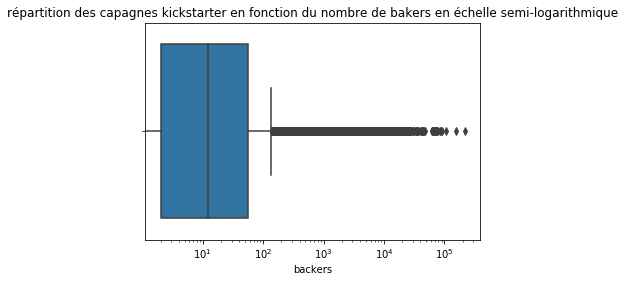

In [9]:
sns.boxplot(df.backers)
plt.semilogx() #En echelle log pour plus de détails
plt.title('répartition des capagnes kickstarter en fonction du nombre de bakers en échelle semi-logarithmique')

In [10]:
print(df.backers.quantile(0.75))

56.0


La plupart des campagnes ont très peu de 'bakers'. 50 % en ont moins de 12, 75% moins de 56.
Il va donc faloir regrouper les grandes valeurs ensemble pour pouvoirs leurs donner un poids et être plus lisibles.

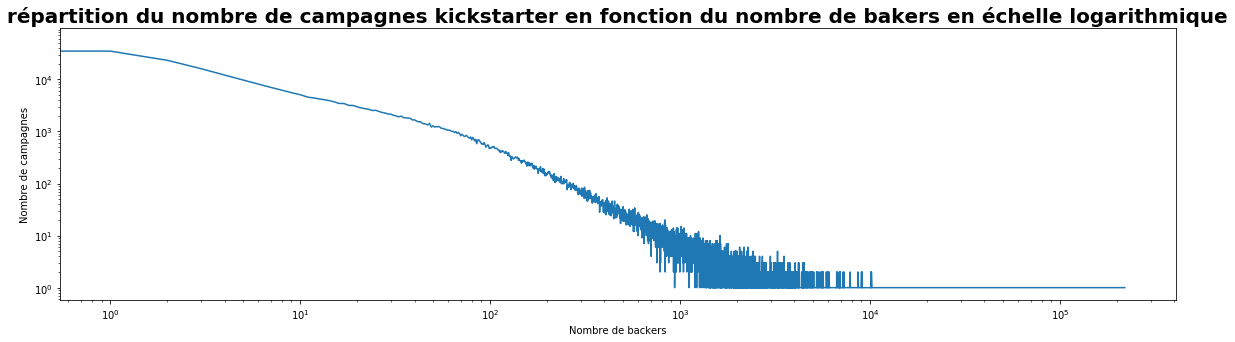

In [11]:
out=df.groupby(['backers']).size()
out.plot(figsize=(20,5))
plt.loglog()
plt.title('répartition du nombre de campagnes kickstarter en fonction du nombre de bakers en échelle logarithmique',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Nombre de backers')
plt.show()

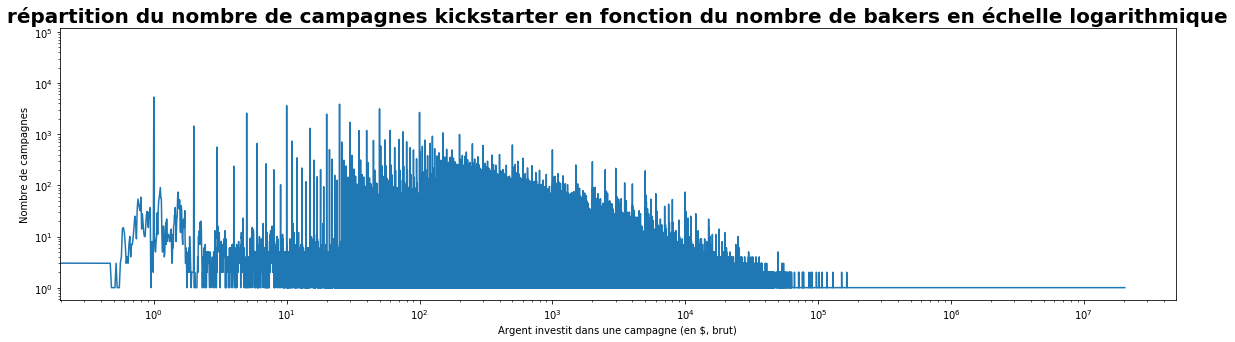

In [12]:
out=df.groupby(['usd pledged']).size()
out.plot(figsize=(20,5))
plt.loglog()
plt.title('répartition du nombre de campagnes kickstarter en fonction du nombre de bakers en échelle logarithmique',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Argent investit dans une campagne (en $, brut)')
plt.show()

La plupart des campagnes récoltent moins de 10 000 $, celles récoltants plus sont moins nombreuses.

## Analyse univariée

### main_category

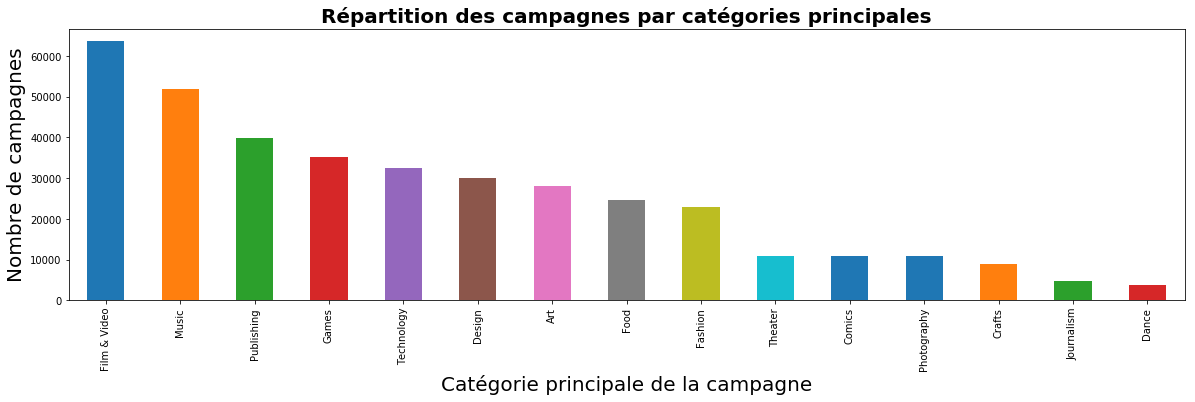

In [13]:
out=df.groupby(['main_category']).size().sort_values(ascending=[False])
out.plot.bar(figsize=(20,5))
plt.title('Répartition des campagnes par catégories principales',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes').set_fontsize(20)
plt.xlabel('Catégorie principale de la campagne').set_fontsize(20)
        
plt.show()

### currency

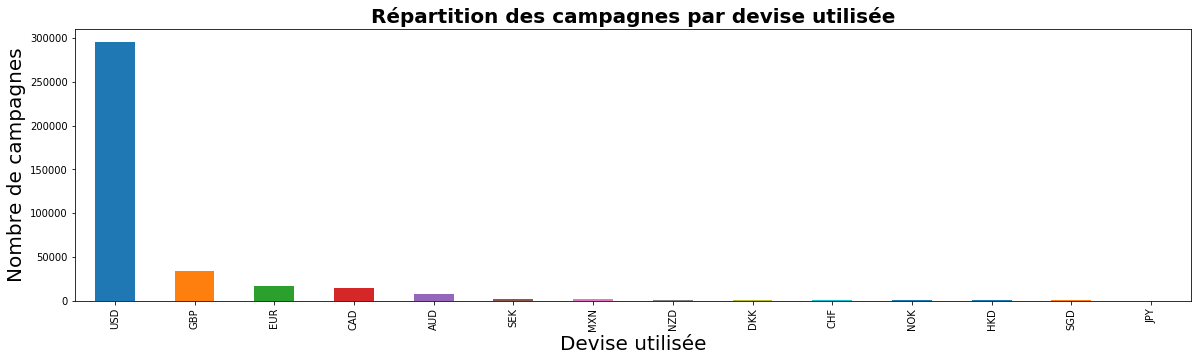

In [14]:
out=df.groupby(['currency']).size().sort_values(ascending=[False])
out.plot.bar(figsize=(20,5))
plt.title('Répartition des campagnes par devise utilisée',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes').set_fontsize(20)
plt.xlabel('Devise utilisée').set_fontsize(20)
        
plt.show()

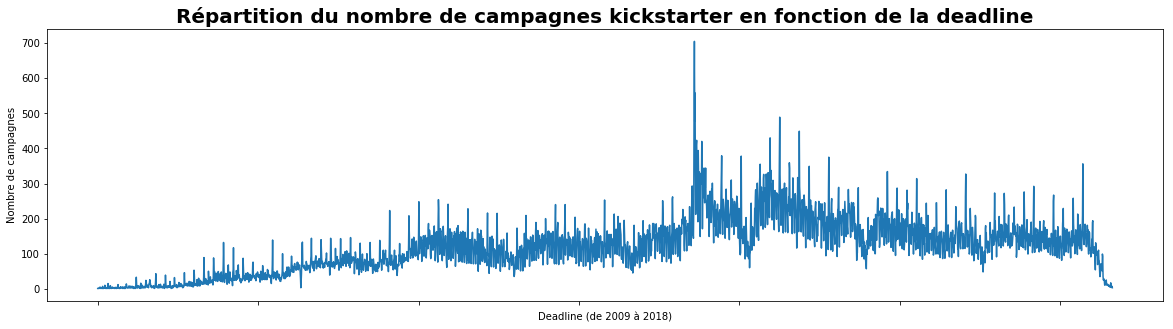

In [15]:
out=df.groupby(['deadline']).size()
out.plot(figsize=(20,5))
plt.title('Répartition du nombre de campagnes kickstarter en fonction de la deadline',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Deadline (de 2009 à 2018)')

plt.show()

On peut constater une lente augmentation du nombre de campagne avant d'atteindre un pic. Ce nombre atteint un plateau et ne varie pas trop globalement. Localement, il y a quelques variations extrêmes.

### But à atteindre

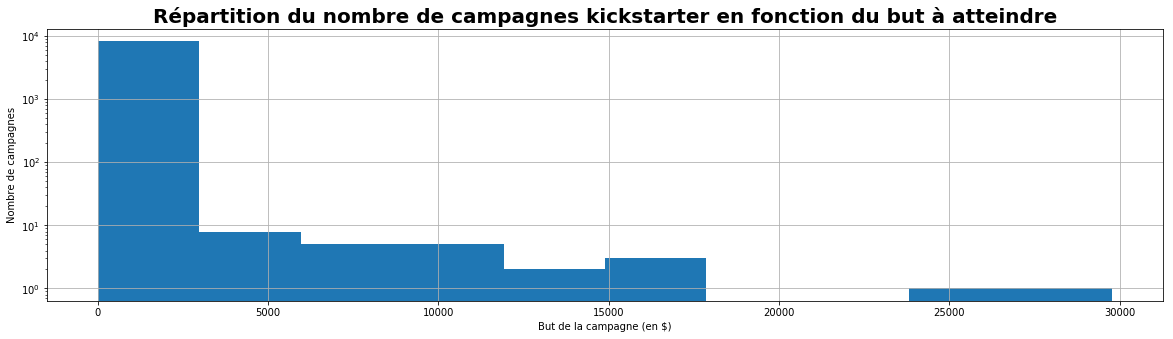

In [16]:
out=df.groupby(['goal']).size()
out.hist(figsize=(20,5))
plt.semilogy()
plt.title('Répartition du nombre de campagnes kickstarter en fonction du but à atteindre',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('But de la campagne (en $)')

plt.show()

## Analyse multivariée

Certains éléments semble plus interessants à étudier ensemble que d'autres.
On peut par exemple comparer usd_goal_real à goal.
Une autre étude qui peut être interressante est la comparaison usd_pledged et usd_pledged_real en prenant en compte les différentes devises (currency) utilisées

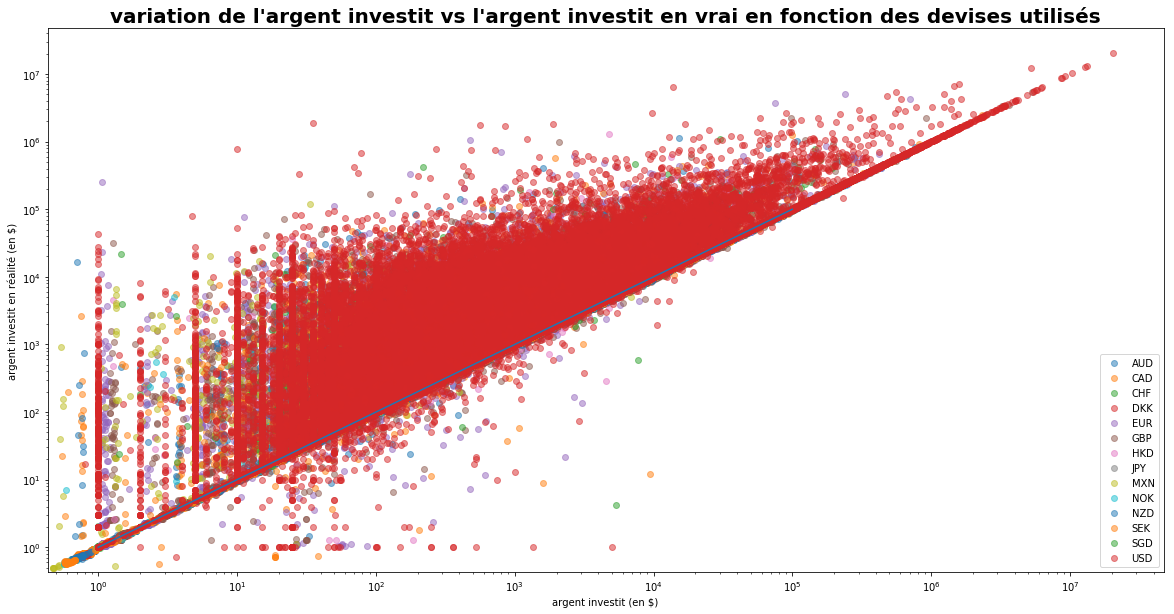

In [68]:
groups=df.groupby(['currency'])['currency','usd pledged','usd_pledged_real']

fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.scatter(group['usd pledged'], group['usd_pledged_real'],marker='o', label=name,alpha=0.5)
ax.legend()
ax.loglog()
ax.plot([1,100000],[1,100000])
plt.title("variation de l'argent investit vs l'argent investit en vrai en fonction des devises utilisés",fontweight="bold").set_fontsize(20)
plt.ylabel('argent investit en réalité (en $)')
plt.xlabel('argent investit (en $)')
plt.show()

On remarque que l'argent investit en réalité est soit plus grand, soit égale à l'argent investit (sauf exception) et que cela ne varie pas en fonction de la devise.
Par ailleur, on remarque une majorité d'utilisation du dollar.